In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.ndimage as ndi
import skimage.feature as feature

In [2]:
# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im1 = ndi.rotate(im, 15, mode='constant')
im2 = ndi.gaussian_filter(im1, 4)
im3 = im2 + 0.2 * np.random.random(im2.shape)


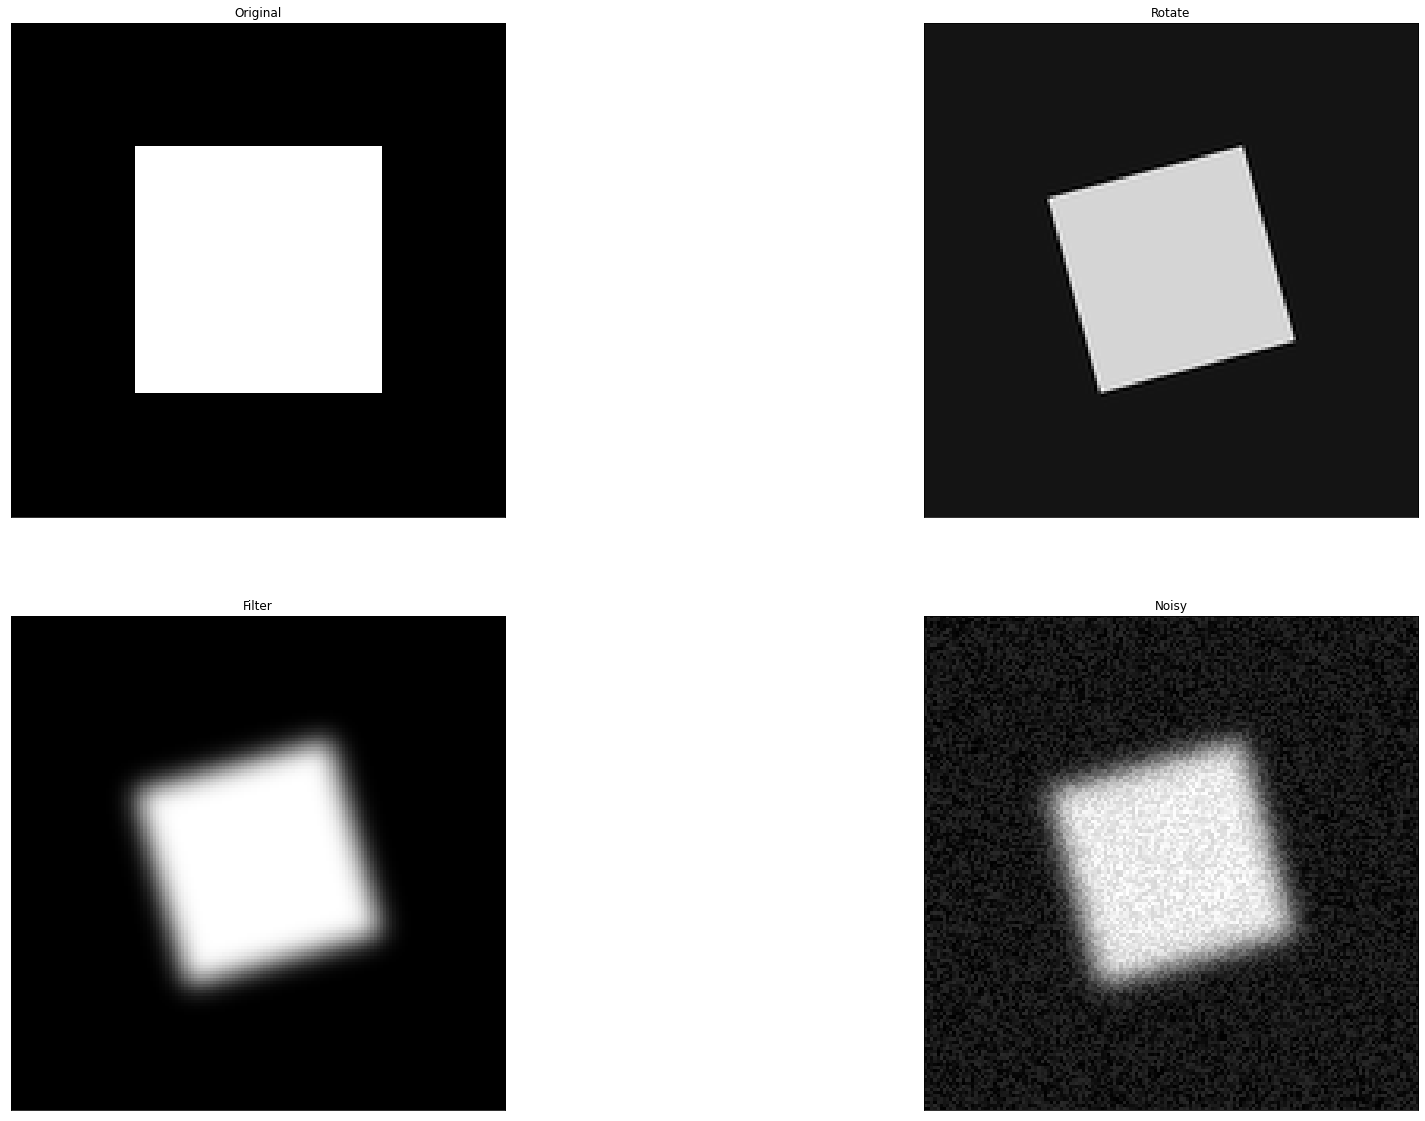

In [3]:
plt.figure(figsize=(30,20))
plt.subplot(221)
plt.imshow(im, cmap='gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(im1, cmap='gray')
plt.title("Rotate")
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.imshow(im2, cmap='gray')
plt.title("Filter")
plt.xticks([])
plt.yticks([])
plt.subplot(224)
plt.imshow(im3, cmap='gray')
plt.title("Noisy")
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
edges1 = feature.canny(im3)
edges2 = feature.canny(im3, sigma=3)

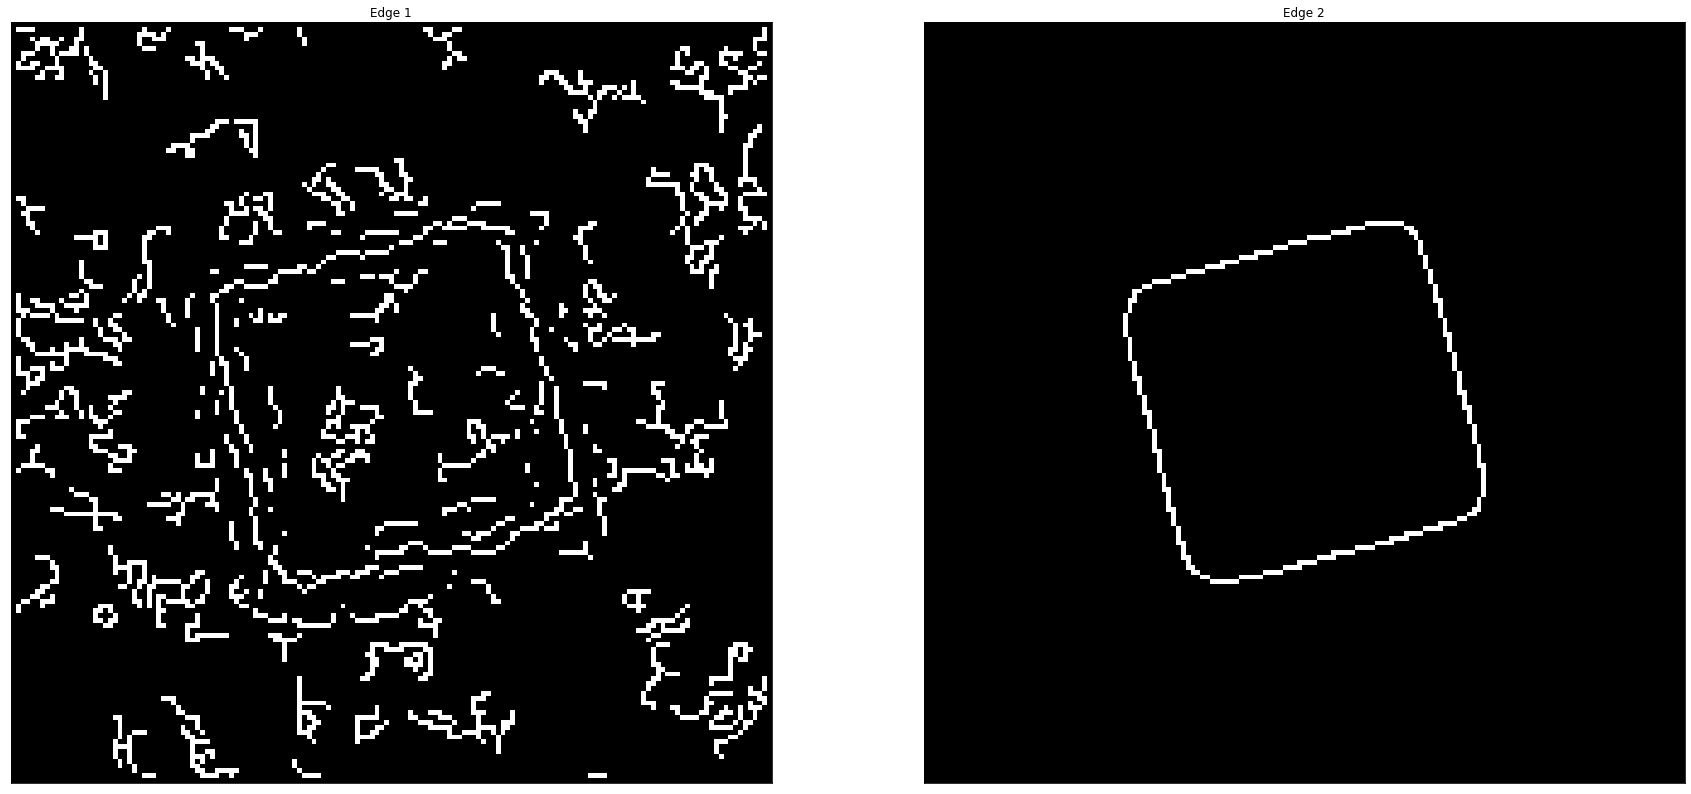

In [5]:
plt.figure(figsize=(30,20))
plt.subplot(121)
plt.imshow(edges1, cmap='gray')
plt.title("Edge 1")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(edges2, cmap='gray')
plt.title("Edge 2")
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    

In [7]:
gauss_kernel = np.array([[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]])
sobel_kernel_x = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])

print(gauss_kernel)
print(sobel_kernel_x)
print(sobel_kernel_y)


[[1 2 1]
 [2 4 2]
 [1 2 1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [8]:
def set_border(arr):
  row, col = arr.shape
  br = row + 2
  bc = col + 2
  border_arr = np.zeros((br, bc))
  
  for i in range(br):
    for j in range(bc):
      if i == 0 and j == 0:
        border_arr[i][j] = arr[0][0]
      elif i == 0 and j == bc - 1:
        border_arr[i][j] = arr[0][col - 1]
      elif i == br - 1 and j == 0 :
        border_arr[i][j] = arr[row - 1][0]
      elif i == br - 1 and j == bc - 1:
        border_arr[i][j] = arr[row - 1][col - 1]
      elif i == 0:
        border_arr[i][j] = arr[0][j - 1]
      elif i == br - 1:
        border_arr[i][j] = arr[row - 1][j - 1]
      elif j == 0:
        border_arr[i][j] = arr[i - 1][0]
      elif j == bc - 1:
        border_arr[i][j] = arr[i - 1][col-1]
      else:
        border_arr[i][j] = arr[i - 1][j - 1]

  return border_arr


In [9]:
def filter_2d(img_arr, kernel):
  if(kernel.shape[0] != 3 and kernel.shape[1] != 3):
      return img_arr
  border_img = set_border(img_arr)
  r, c = border_img.shape
  filtered_img = np.zeros((r, c))
  kernel_weight = kernel.sum()
  if(kernel_weight == 0):
    kernel_weight = 1
  
  for i in range(1, r - 1):
    for j in range(1, c - 1):
      pixel_mat = border_img[i - 1 : i + 2, j - 1: j + 2]
      conv = pixel_mat * kernel
      conv_pixel = conv.sum()/kernel_weight
      filtered_img[i][j] = conv_pixel
  return filtered_img[1:r-1, 1:c-1]


In [10]:
img = plt.imread('people.jpeg')
img_gray = rgb2gray(img)

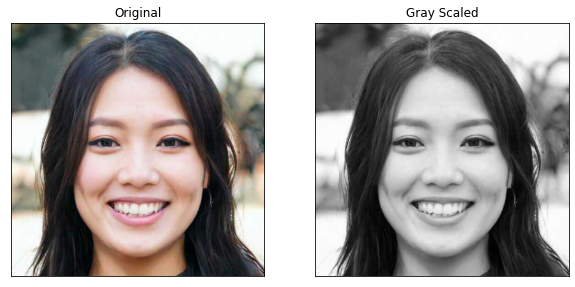

In [11]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_gray, cmap="gray")
plt.title("Gray Scaled")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
gaussian_smooth_img = filter_2d(img_gray, gauss_kernel)


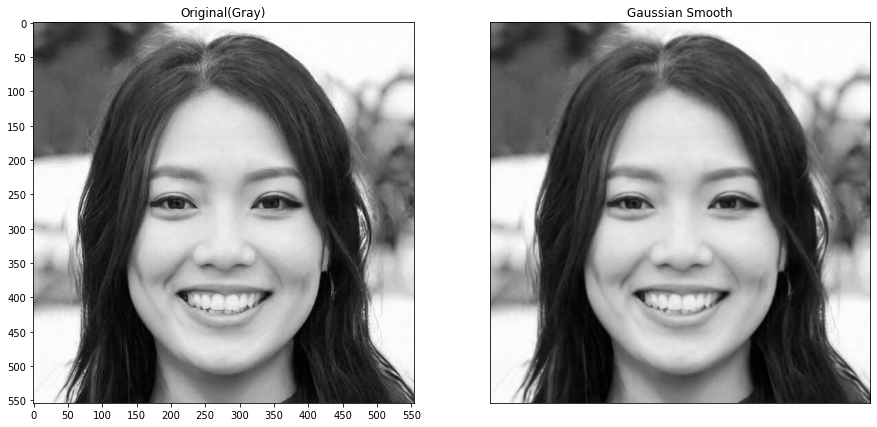

In [13]:
plt.figure(figsize=(15,40))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title("Original(Gray)")
plt.xticks(np.arange(0, img_gray.shape[1], 50))
plt.yticks(np.arange(0, img_gray.shape[0], 50))
plt.subplot(122)
plt.imshow(gaussian_smooth_img, cmap='gray')
plt.title("Gaussian Smooth")
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
sobel_img_x_direction = filter_2d(gaussian_smooth_img, sobel_kernel_x)
sobel_img_y_direction = filter_2d(gaussian_smooth_img, sobel_kernel_y)

In [15]:
sobel_img_x_direction = sobel_img_x_direction / sobel_img_x_direction.max() * 255.0
sobel_img_y_direction = sobel_img_y_direction / sobel_img_y_direction.max() * 255.0

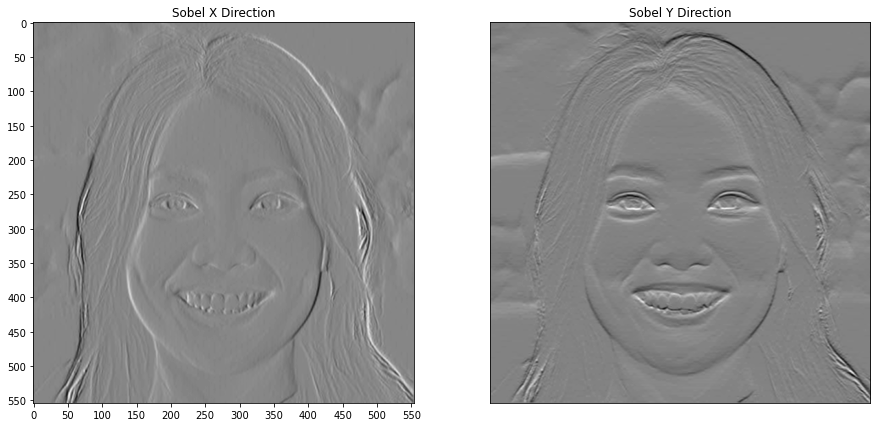

In [16]:
plt.figure(figsize=(15,40))
plt.subplot(121)
plt.imshow(sobel_img_x_direction, cmap='gray')
plt.title("Sobel X Direction")
plt.xticks(np.arange(0, sobel_img_x_direction.shape[1], 50))
plt.yticks(np.arange(0, sobel_img_x_direction.shape[0], 50))
plt.subplot(122)
plt.imshow(sobel_img_y_direction, cmap='gray')
plt.title("Sobel Y Direction")
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
sobel_img_gradient = np.hypot(sobel_img_x_direction, sobel_img_y_direction)
sobel_img_gradient = sobel_img_gradient / sobel_img_gradient.max() * 255.0

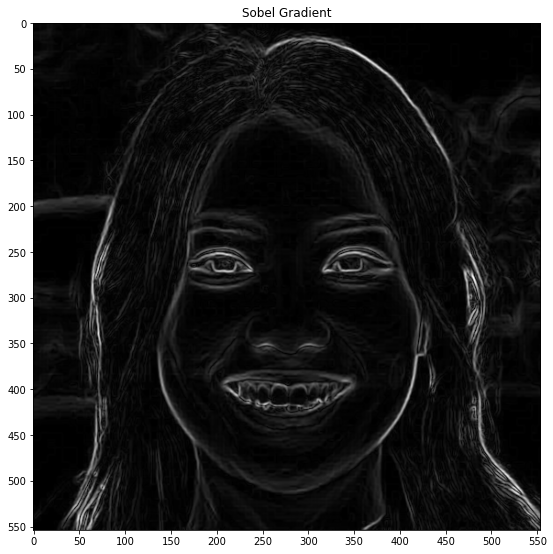

In [18]:
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.imshow(sobel_img_gradient, cmap='gray')
plt.title("Sobel Gradient")
plt.xticks(np.arange(0, sobel_img_gradient.shape[1], 50))
plt.yticks(np.arange(0, sobel_img_gradient.shape[0], 50))
plt.show()

In [19]:
sobel_img_theta = np.arctan2(sobel_img_y_direction, sobel_img_x_direction)

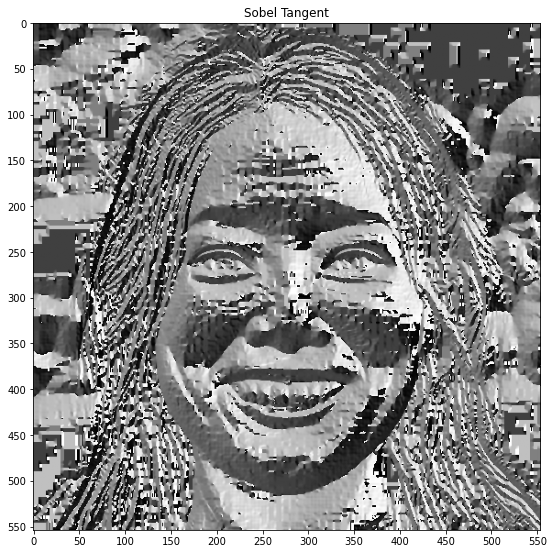

In [20]:
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.imshow(sobel_img_theta, cmap='gray')
plt.title("Sobel Tangent")
plt.xticks(np.arange(0, sobel_img_theta.shape[1], 50))
plt.yticks(np.arange(0, sobel_img_theta.shape[0], 50))
plt.show()